### Step 1: Import Libraries and csv files

In [27]:
# Import the required libraries
import pandas as pd
from pathlib import Path
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn import metrics
from sklearn.metrics import balanced_accuracy_score, confusion_matrix, classification_report
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler, LabelEncoder, MinMaxScaler
from sklearn.linear_model import Lasso, LinearRegression
from sklearn.metrics import mean_squared_error,r2_score, mean_absolute_error
from sklearn.model_selection import GridSearchCV

import warnings
warnings.filterwarnings('ignore')

In [28]:
# Read the CSV file into a Pandas DataFrame
car_prices_df = pd.read_csv(Path("Resources/car_prices.csv"))

# Review the DataFrame
car_prices_df.head()


,year,make,model,trim,body,transmission,vin,state,condition,odometer,color,interior,seller,mmr,sellingprice,saledate
0,2015,Kia,Sorento,LX,SUV,automatic,5xyktca69fg566472,ca,5.0,16639.0,white,black,kia motors america inc,20500.0,21500.0,Tue Dec 16 2014 12:30:00 GMT-0800 (PST)
1,2015,Kia,Sorento,LX,SUV,automatic,5xyktca69fg561319,ca,5.0,9393.0,white,beige,kia motors america inc,20800.0,21500.0,Tue Dec 16 2014 12:30:00 GMT-0800 (PST)
2,2014,BMW,3 Series,328i SULEV,Sedan,automatic,wba3c1c51ek116351,ca,45.0,1331.0,gray,black,financial services remarketing (lease),31900.0,30000.0,Thu Jan 15 2015 04:30:00 GMT-0800 (PST)
3,2015,Volvo,S60,T5,Sedan,automatic,yv1612tb4f1310987,ca,41.0,14282.0,white,black,volvo na rep/world omni,27500.0,27750.0,Thu Jan 29 2015 04:30:00 GMT-0800 (PST)
4,2014,BMW,6 Series Gran Coupe,650i,Sedan,automatic,wba6b2c57ed129731,ca,43.0,2641.0,gray,black,financial services remarketing (lease),66000.0,67000.0,Thu Dec 18 2014 12:30:00 GMT-0800 (PST)


In [29]:
# Check for Null Values
car_prices_df.isnull().sum()

year                0
make            10301
model           10399
trim            10651
body            13195
transmission    65352
vin                 4
state               0
condition       11820
odometer           94
color             749
interior          749
seller              0
mmr                38
sellingprice       12
saledate           12
dtype: int64

In [30]:
#Percentage of null values in data
car_prices_df.isnull().mean()*100

year             0.000000
make             1.843292
model            1.860829
trim             1.905922
body             2.361154
transmission    11.694287
vin              0.000716
state            0.000000
condition        2.115107
odometer         0.016821
color            0.134028
interior         0.134028
seller           0.000000
mmr              0.006800
sellingprice     0.002147
saledate         0.002147
dtype: float64

In [31]:
car_prices_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 558837 entries, 0 to 558836
Data columns (total 16 columns):
 #   Column        Non-Null Count   Dtype  
---  ------        --------------   -----  
 0   year          558837 non-null  int64  
 1   make          548536 non-null  object 
 2   model         548438 non-null  object 
 3   trim          548186 non-null  object 
 4   body          545642 non-null  object 
 5   transmission  493485 non-null  object 
 6   vin           558833 non-null  object 
 7   state         558837 non-null  object 
 8   condition     547017 non-null  float64
 9   odometer      558743 non-null  float64
 10  color         558088 non-null  object 
 11  interior      558088 non-null  object 
 12  seller        558837 non-null  object 
 13  mmr           558799 non-null  float64
 14  sellingprice  558825 non-null  float64
 15  saledate      558825 non-null  object 
dtypes: float64(4), int64(1), object(11)
memory usage: 68.2+ MB


In [32]:
#sns.pairplot(car_prices_df, hue="odometer")

In [7]:


#x_vars= ["year", "odometer", "trim", "body", "transmission","state", "condition", "color"]
#y_vars= ["sellingprice"]
g= sns.PairGrid(car_prices_df, hue="make", x_vars=x_vars, y_vars=y_vars)
#g.map_diag(sns.histplot, color=".3")
g.map_offdiag(sns.scatterplot)
g.add_legend()

NameError: name 'x_vars' is not defined

In [8]:
#sns.catplot(data=car_prices_df, x="year", y="sellingprice", kind="box")

In [33]:
car_prices_df.dropna(subset=['transmission'])
car_prices_df=car_prices_df.dropna()
car_prices_df= car_prices_df.drop(columns=['vin','saledate','seller'], axis=1)
car_prices_df.head(2)

,year,make,model,trim,body,transmission,state,condition,odometer,color,interior,mmr,sellingprice
0,2015,Kia,Sorento,LX,SUV,automatic,ca,5.0,16639.0,white,black,20500.0,21500.0
1,2015,Kia,Sorento,LX,SUV,automatic,ca,5.0,9393.0,white,beige,20800.0,21500.0


In [34]:
make_pp= car_prices_df.make.value_counts()[:10]
make_pp.index

Index(['Ford', 'Chevrolet', 'Nissan', 'Toyota', 'Dodge', 'Honda', 'Hyundai',
       'BMW', 'Kia', 'Chrysler'],
      dtype='object', name='make')

In [35]:
tencar_df= car_prices_df[car_prices_df['make'].isin(make_pp.index)]

In [39]:
tencar_df.make.value_counts() , tencar_df.shape

(make
 Ford         81013
 Chevrolet    54150
 Nissan       44043
 Toyota       35313
 Dodge        27181
 Honda        24781
 Hyundai      18659
 BMW          17509
 Kia          15828
 Chrysler     15133
 Name: count, dtype: int64,
 (333610, 13))

In [40]:
tencar_df.duplicated().sum()

0

In [41]:
tencar_df = tencar_df[['year','make','model','trim','transmission','state','condition','odometer','color','interior','mmr','sellingprice']]

In [42]:
tencar_df.head(3)

,year,make,model,trim,transmission,state,condition,odometer,color,interior,mmr,sellingprice
0,2015,Kia,Sorento,LX,automatic,ca,5.0,16639.0,white,black,20500.0,21500.0
1,2015,Kia,Sorento,LX,automatic,ca,5.0,9393.0,white,beige,20800.0,21500.0
2,2014,BMW,3 Series,328i SULEV,automatic,ca,45.0,1331.0,gray,black,31900.0,30000.0


In [43]:
#selling price, odometer plots


In [44]:
cat_encoder = LabelEncoder()

In [45]:
for i in tencar_df.columns:
    if tencar_df[i].dtype =='object':
        tencar_df[i] = cat_encoder.fit_transform(tencar_df[i])

In [46]:
tencar_df.head(3)

,year,make,model,trim,transmission,state,condition,odometer,color,interior,mmr,sellingprice
0,2015,7,231,347,0,2,5.0,16639.0,17,1,20500.0,21500.0
1,2015,7,231,347,0,2,5.0,9393.0,17,0,20800.0,21500.0
2,2014,0,4,101,0,2,45.0,1331.0,7,1,31900.0,30000.0


<Axes: >

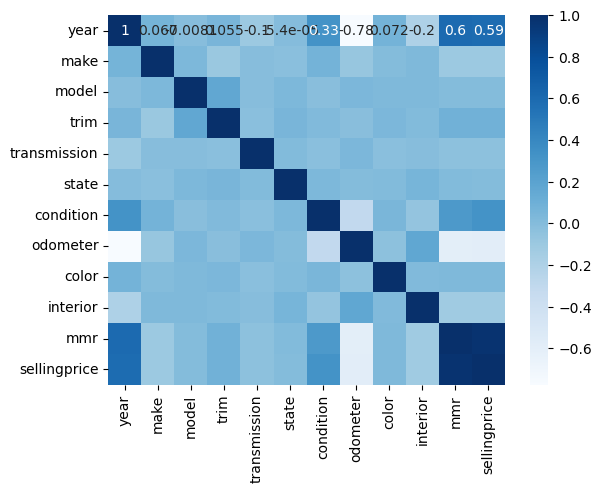

In [47]:
make_sales = tencar_df.corr()
sns.heatmap(make_sales, cmap="Blues", annot=True)

In [48]:
scaler = MinMaxScaler()

In [49]:
X= tencar_df.iloc[:,:-1]
y= tencar_df.iloc[:,-1]

In [50]:
y

0         21500.0
1         21500.0
2         30000.0
4         67000.0
5         10900.0
           ...   
558828     7800.0
558831    22800.0
558834    34000.0
558835    11100.0
558836    26700.0
Name: sellingprice, Length: 333610, dtype: float64

In [51]:
for i in X.columns:
    X[i] = scaler.fit_transform(np.array(X[i]).reshape(-1,1))

In [52]:
X.head(4)

,year,make,model,trim,transmission,state,condition,odometer,color,interior,mmr
0,1.00,0.777778,0.788396,0.542188,0.0,0.060606,0.083333,0.016638,0.894737,0.0625,0.116352
1,1.00,0.777778,0.788396,0.542188,0.0,0.060606,0.083333,0.009392,0.894737,0.0000,0.118057
2,0.96,0.000000,0.013652,0.157813,0.0,0.060606,0.916667,0.001330,0.368421,0.0625,0.181134
4,0.96,0.000000,0.058020,0.250000,0.0,0.060606,0.875000,0.002640,0.368421,0.0625,0.374911


In [53]:
xtrain,xtest,ytrain,ytest = train_test_split(X,y,test_size=0.2,random_state=1)

In [54]:
xtrain.shape, ytrain.shape

((266888, 11), (266888,))

In [55]:
lasso_model = Lasso()
lasso_model.fit(xtrain,ytrain)

Lasso()

In [56]:
pred=lasso_model.predict(xtest)

In [57]:
msre = round(np.sqrt(mean_squared_error(ytest,pred)),2)
msre

1575.72

In [58]:
mean_squared_error(ytest,pred)

2482889.3851782745

In [59]:
lasso_model.coef_

array([-8.17454142e+02, -8.23924698e+01,  1.12124253e+01, -4.20897639e+01,
       -1.24524261e+02, -1.74620816e+02,  1.81280969e+03, -2.03085008e+02,
        1.14732524e+02, -3.84527396e+01,  1.72695214e+05])

In [60]:
lasso_model.intercept_

-232.53399963463198

In [61]:
r2_score(ytest,pred)

0.9631047733122278

In [62]:
param = {'alpha' :[1e-15,1e-10,1e-8,1e-3,1e-2,1,5,10,20,30,40,50,100, 1000, 10000]}

In [63]:
lasso_twocv= GridSearchCV(lasso_model, param, cv=3, n_jobs=1)

In [64]:
lasso_twocv.fit(xtrain, ytrain)

GridSearchCV(cv=3, estimator=Lasso(), n_jobs=1,
             param_grid={'alpha': [1e-15, 1e-10, 1e-08, 0.001, 0.01, 1, 5, 10,
                                   20, 30, 40, 50, 100, 1000, 10000]})

In [65]:
pred_two= lasso_twocv.predict(xtest)

In [66]:
mean_absolute_error(ytest, pred_two)

1007.7141075641179

In [67]:
mean_squared_error(ytest, pred_two)

2480726.3690540222

In [68]:
r2_score(ytest, pred_two)

0.9631369152879073

In [69]:
lasso_twocv.best_estimator_

Lasso(alpha=0.001)

In [70]:
lass_two = Lasso(alpha=10000)

In [71]:
lass_two.fit(xtrain, ytrain)

Lasso(alpha=10000)

In [72]:
lass_two.intercept_

12879.989321363268

In [73]:
lass_two.coef_

array([ 0., -0.,  0.,  0., -0.,  0.,  0., -0.,  0., -0.,  0.])

In [74]:
coef_dict={}
for coef, feat in zip(lasso_model.coef_,X.columns):
    coef_dict[feat] = coef
coef_dict

{'year': -817.4541415794246,
 'make': -82.39246984041785,
 'model': 11.212425334902603,
 'trim': -42.08976387141737,
 'transmission': -124.52426052484583,
 'state': -174.62081592827352,
 'condition': 1812.809692256023,
 'odometer': -203.0850078595758,
 'color': 114.73252408179597,
 'interior': -38.452739581848,
 'mmr': 172695.21381646427}

In [80]:
predict_lasso = lass_two.predict(xtest)


In [93]:
coef_names = tencar_df.drop('sellingprice',axis=1).columns

print(coef_names)

Index(['year', 'make', 'model', 'trim', 'transmission', 'state', 'condition',
       'odometer', 'color', 'interior', 'mmr'],
      dtype='object')


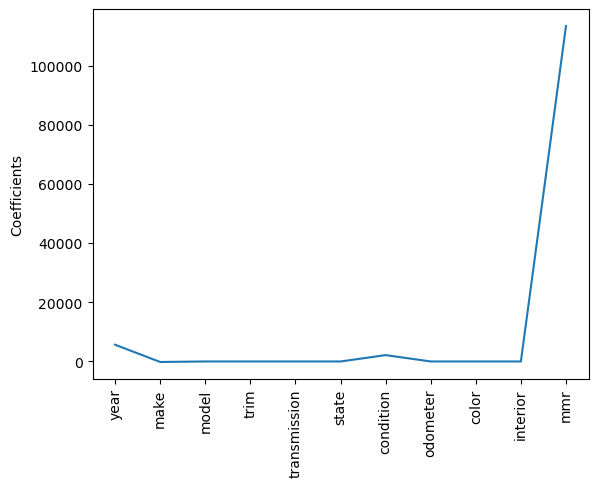

In [94]:

lasso = Lasso(alpha=100)
lasso_coef = lasso.fit(X, y).coef_

plt.plot(range(len(names)), lasso_coef)
plt.xticks(range(len(names)), names, rotation=90)
plt.ylabel("Coefficients")
plt.show()

In [95]:
regres=LinearRegression()
regres.fit(xtrain, ytrain)

LinearRegression()

In [96]:
lin_pred= regres.predict(xtest)

In [97]:
mean_absolute_error(ytest, lin_pred)

1007.7144464199594

In [98]:
regres.coef_

array([-1.28777353e+03, -8.42021388e+01,  3.53425116e+01, -6.36956173e+01,
       -1.85697965e+02, -1.83549492e+02,  1.81607302e+03, -1.24029283e+03,
        1.29730453e+02, -5.85712162e+01,  1.73356767e+05])

In [99]:
regres.intercept_

175.55860464331636

In [100]:
r2_score(ytest, lin_pred)

0.9631369123746455

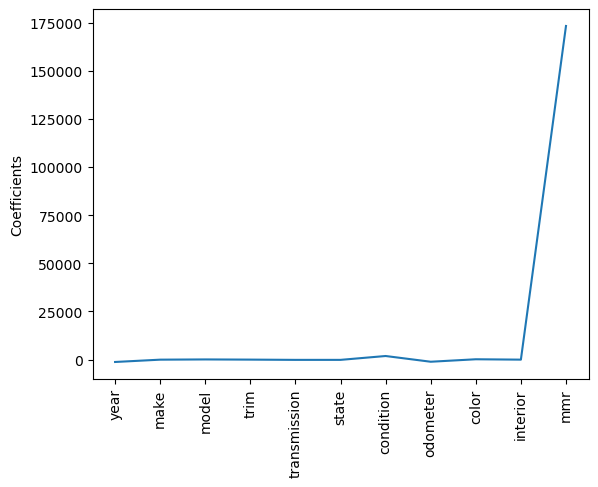

In [101]:
#VISUALIZE COEFFICIENTS
linear_coef=regres.fit(X,y).coef_

plt.plot(range(len(coef_names)), linear_coef)
plt.xticks(range(len(coef_names)), coef_names, rotation=90)
plt.ylabel("Coefficients")
plt.show()


### Step 2: Exploratory Data Analysis

In [ ]:
# Separate the data into target and features

# Separate the y variable, the target


# Separate the X variable, the features


In [ ]:
sns.FacetGrid(car_prices_df, col="make", row="mode")
